# Project title :- Amazon time predcition


### Type - EDA

### GitHub Link - https://github.com/O-M18/Delivery_Time_Predcition

## Project Summary



The Delivery Time Prediction App is a web-based application built using Streamlit and machine learning to accurately estimate delivery times for orders. The app integrates multiple features, including agent details (age and rating), vehicle type, traffic conditions, weather, order category, and geographic coordinates of the store and delivery location. It also calculates key operational metrics, such as the distance between the store and the drop location and the time to pickup, which are critical inputs for predicting delivery duration.

The underlying predictive model is based on XGBoost, chosen for its accuracy and ability to handle numerical and categorical features efficiently. Once the user inputs all necessary details, the app provides a real-time prediction of delivery time, displayed in an intuitive dashboard-style interface. Users can view results through interactive mini-cards for metrics like distance and pickup time, while the predicted delivery time is highlighted in an animated pop-out card for enhanced visibility.

This project addresses a critical need in the logistics and e-commerce industry. Accurate delivery predictions enable businesses to optimize routes, allocate resources effectively, and provide customers with reliable time estimates. By improving operational efficiency and customer satisfaction, it supports data-driven decision-making and enhances the overall delivery experience. The app’s modern, professional interface ensures that both managers and staff can quickly interpret key metrics and predictions. Its scalable design allows for easy integration into web platforms, internal dashboards, or mobile applications, making it a versatile tool for modern delivery operations

#### Load all necessary libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)

#### Load dataset

In [2]:
# load data into dataframe format
df=pd.read_csv(r'amazon_delivery.csv')

#### Read data 

In [3]:
# first 10 records of dataset
df.head(10)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
5,fxuu788413734,22,4.8,17.431668,78.408321,17.461668,78.438321,2022-03-11,21:20:00,21:30:00,Cloudy,Jam,motorcycle,Urban,130,Toys
6,njmo150975311,33,4.7,23.369746,85.339820,23.479746,85.449820,2022-03-04,19:15:00,19:30:00,Fog,Jam,scooter,Metropolitian,200,Toys
7,jvjc772545076,35,4.6,12.352058,76.606650,12.482058,76.736650,2022-03-14,17:25:00,17:30:00,Cloudy,Medium,motorcycle,Metropolitian,160,Snacks
8,uaeb808891380,22,4.8,17.433809,78.386744,17.563809,78.516744,2022-03-20,20:55:00,21:05:00,Stormy,Jam,motorcycle,Metropolitian,170,Electronics
9,bgvc052754213,36,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55:00,22:10:00,Fog,Jam,motorcycle,Metropolitian,230,Toys


In [4]:
# last 10 records of the dataset
df.tail(10)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
43729,llbw528617620,36,4.8,12.310972,76.659264,12.440972,76.789264,2022-03-18,21:10:00,21:20:00,Sunny,Jam,van,Urban,145,Sports
43730,spgc082793916,37,4.8,13.022394,80.242439,13.042394,80.262439,2022-04-05,09:35:00,09:50:00,Sandstorms,Low,van,Metropolitian,100,Clothing
43731,cuqm879666070,30,4.2,26.469003,80.316344,26.539003,80.386344,2022-02-14,18:10:00,18:25:00,Cloudy,Medium,motorcycle,Metropolitian,210,Apparel
43732,uftb261665932,28,4.9,13.029198,77.570997,13.059198,77.600997,2022-03-30,21:55:00,22:00:00,Sandstorms,Jam,scooter,Metropolitian,145,Toys
43733,gcxb277393192,35,4.2,23.371292,85.327872,23.481292,85.437872,2022-03-08,21:45:00,21:55:00,Windy,Jam,motorcycle,Metropolitian,165,Sports
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen
43738,nsyz997960170,23,4.9,23.351058,85.325731,23.431058,85.405731,2022-03-02,17:10:00,17:15:00,Fog,Medium,scooter,Metropolitian,180,Cosmetics


#### Data set information

In [5]:
print(f' dataset row: {df.shape[0]}\ndataset columns: {df.shape[1]}')

 dataset row: 43739
dataset columns: 16


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


#### finding null values and duplicate values

In [7]:
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [8]:
def find_Null(df):
    missing_summary=pd.DataFrame({
    'Missing_count':df.isnull().sum(),
    'Missing %':df.isnull().mean()*100})
    return missing_summary

find_Null(df)

,Missing_count,Missing %
Order_ID,0,0.000000
Agent_Age,0,0.000000
Agent_Rating,54,0.123460
Store_Latitude,0,0.000000
Store_Longitude,0,0.000000
Drop_Latitude,0,0.000000
Drop_Longitude,0,0.000000
Order_Date,0,0.000000
Order_Time,0,0.000000
Pickup_Time,0,0.000000


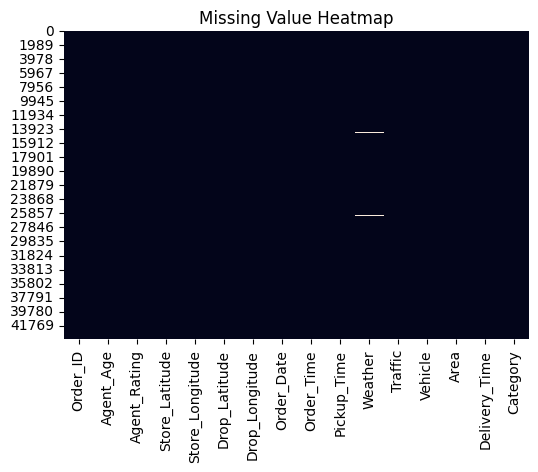

In [3]:
# Visualizing the missing values
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), cbar=False,)
plt.title("Missing Value Heatmap")
plt.show()

In [10]:
# Finding duplicate values
df.duplicated().sum()

np.int64(0)

### About Dataset


*  dataset contian 43.7k rows along 16 features
* Outof 16 column time of order and pickup is in wrong format
* Dataset contain no duplicates 
* Feature like weather (0.2%) and agent_age (0.1) have missing value but they can be eliminate since it is very small number.

#### Explore features 

In [11]:
# To get columns name 
print(df.columns)

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')


In [12]:
# TO view statistical value of features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Agent_Age,43739.0,29.567137,5.815155,15.000000,25.000000,30.000000,35.000000,50.000000
Agent_Rating,43685.0,4.633780,0.334716,1.000000,4.500000,4.700000,4.900000,6.000000
Store_Latitude,43739.0,17.210960,7.764225,-30.902872,12.933298,18.551440,22.732225,30.914057
Store_Longitude,43739.0,70.661177,21.475005,-88.366217,73.170283,75.898497,78.045359,88.433452
Drop_Latitude,43739.0,17.459031,7.342950,0.010000,12.985996,18.633626,22.785049,31.054057
Drop_Longitude,43739.0,70.821842,21.153148,0.010000,73.280000,76.002574,78.104095,88.563452
Delivery_Time,43739.0,124.905645,51.915451,10.000000,90.000000,125.000000,160.000000,270.000000


In [13]:
df.nunique()

Order_ID           43739
Agent_Age             22
Agent_Rating          28
Store_Latitude       521
Store_Longitude      415
Drop_Latitude       4367
Drop_Longitude      4367
Order_Date            44
Order_Time           177
Pickup_Time          193
Weather                6
Traffic                5
Vehicle                4
Area                   4
Delivery_Time         89
Category              16
dtype: int64

### Variables Description

* The following dataset contain various categorical features such as Category, Weather,Vehicle, and Area etc.
* It also has numerical features such as store Lat,Lan and delivery lat and lan Agent rating.
* Apart from that Age of the agent range from 15 to 50 which is wide range.
* The approx time to deliver order is 120 min which is ~ 3hours.

### Data Wrangling

In [5]:
df[['Order_Time','Pickup_Time']]=df[['Order_Time','Pickup_Time']].apply(
    lambda col: pd.to_datetime(col, format='%H:%M:%S',errors='coerce')
    )
# converting time into time format
df['Order_Time'] = pd.to_datetime(df['Order_Time']).dt.time
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time']).dt.time

In [6]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43739 non-null  object        
 1   Agent_Age        43739 non-null  int64         
 2   Agent_Rating     43685 non-null  float64       
 3   Store_Latitude   43739 non-null  float64       
 4   Store_Longitude  43739 non-null  float64       
 5   Drop_Latitude    43739 non-null  float64       
 6   Drop_Longitude   43739 non-null  float64       
 7   Order_Date       43739 non-null  datetime64[ns]
 8   Order_Time       43648 non-null  object        
 9   Pickup_Time      43739 non-null  object        
 10  Weather          43648 non-null  object        
 11  Traffic          43739 non-null  object        
 12  Vehicle          43739 non-null  object        
 13  Area             43739 non-null  object        
 14  Delivery_Time    43739 non-null  int64

In [7]:
df.iloc[189]

Order_ID                 pbmy587069805
Agent_Age                           35
Agent_Rating                       4.7
Store_Latitude                13.02978
Store_Longitude              80.208812
Drop_Latitude                 13.10978
Drop_Longitude               80.288812
Order_Date         2022-04-06 00:00:00
Order_Time                    20:00:00
Pickup_Time                   20:05:00
Weather                          Sunny
Traffic                           Jam 
Vehicle                            van
Area                    Metropolitian 
Delivery_Time                      135
Category                       Apparel
Name: 189, dtype: object

In [8]:
# drop the null values.
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43594 non-null  object        
 1   Agent_Age        43594 non-null  int64         
 2   Agent_Rating     43594 non-null  float64       
 3   Store_Latitude   43594 non-null  float64       
 4   Store_Longitude  43594 non-null  float64       
 5   Drop_Latitude    43594 non-null  float64       
 6   Drop_Longitude   43594 non-null  float64       
 7   Order_Date       43594 non-null  datetime64[ns]
 8   Order_Time       43594 non-null  object        
 9   Pickup_Time      43594 non-null  object        
 10  Weather          43594 non-null  object        
 11  Traffic          43594 non-null  object        
 12  Vehicle          43594 non-null  object        
 13  Area             43594 non-null  object        
 14  Delivery_Time    43594 non-null  int64     

### Visualize data

### Chart 1

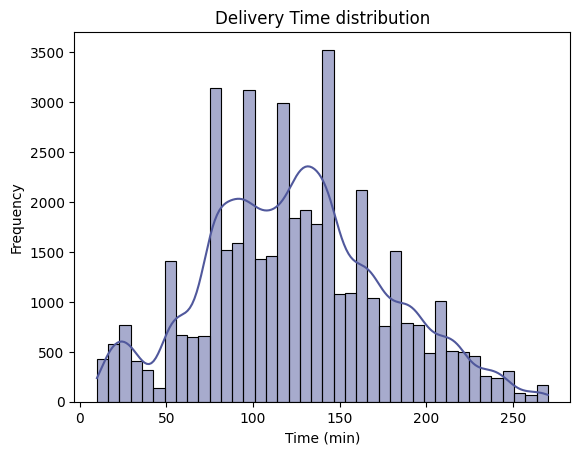

In [9]:
plt.Figure(figsize=(10,6))
sns.histplot(df['Delivery_Time'],bins=40,kde=True,color='#50589C')
plt.title('Delivery Time distribution')
plt.xlabel('Time (min)')
plt.ylabel('Frequency')
plt.show()

#### 1. Why this Plot?<br>
Ans- The following plot help to understand distribution of the traget feature if the dataset. 

#### 2. Insight gain from the plot<br>
Ans- The plot slightly left skewed indicating that most of the time ranges from 100 to 150 min 

### Chart 2

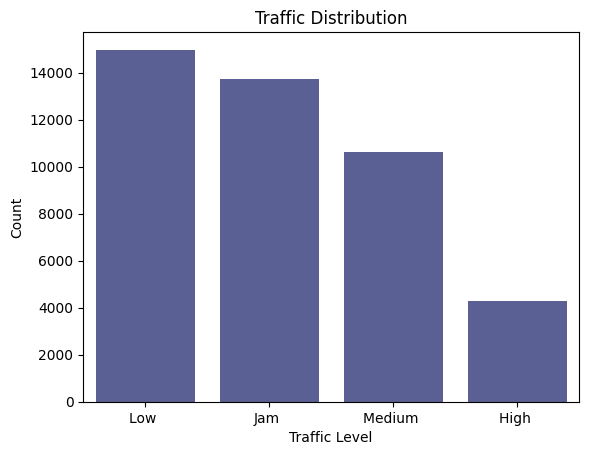

In [18]:
plt.figure()
sns.countplot(x='Traffic', data=df, order=df['Traffic'].value_counts().index,color='#50589C')
plt.title("Traffic Distribution")
plt.xlabel("Traffic Level")
plt.ylabel("Count")
plt.show()

#### 1. Why this plot?<br>
Ans- The following plot help to understand distribution of data among different traffic type.

#### 2.Insight gain from the plot?<br>
Ans- Most fo the order was delivered during low traffic compared to high traffic.

### Chart 3

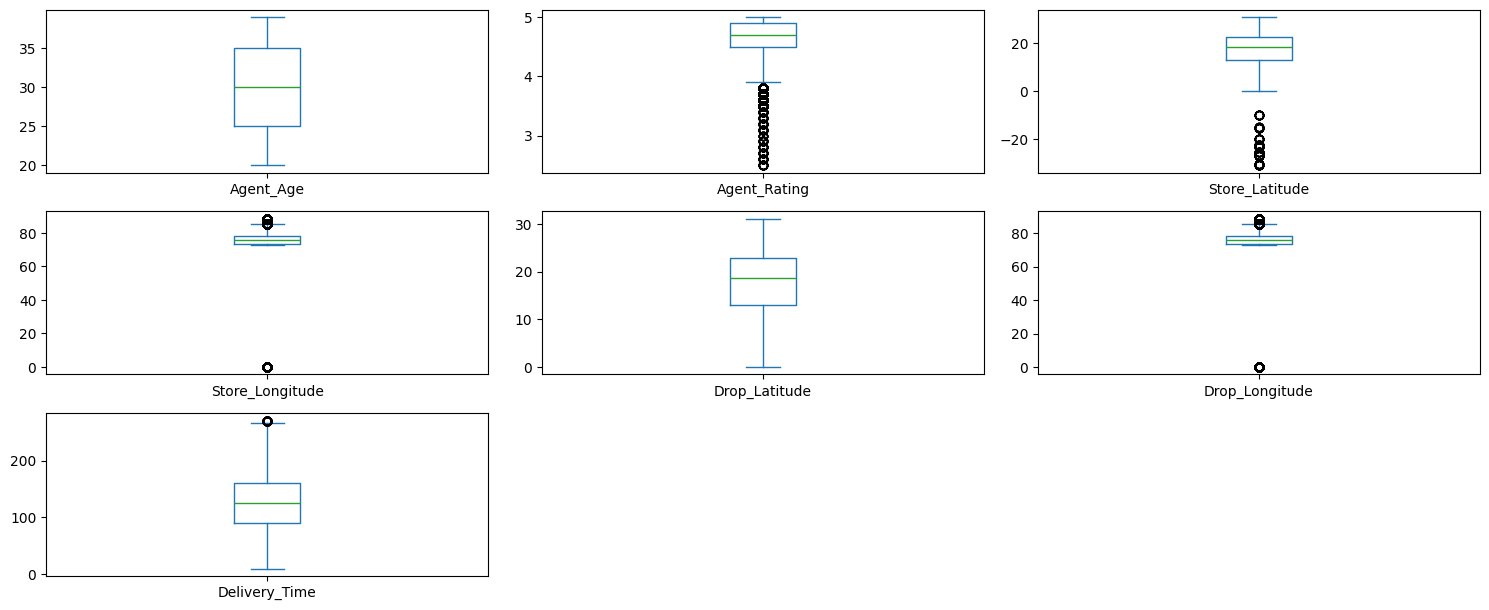

In [ ]:

df.plot(kind="box",subplots=True,layout=(5,3),figsize=(15,10))
plt.tight_layout()
plt.show()


#### 1. Why this plot?<br>
Ans- The following plot help to understand presence of the outlier within the dataset.

#### 2.Insight gain from the plot?<br>
Ans- Plot show presence of the outlier within various feature but most;y higly varying outlier is present in the rating of the agent.

### Chart 4

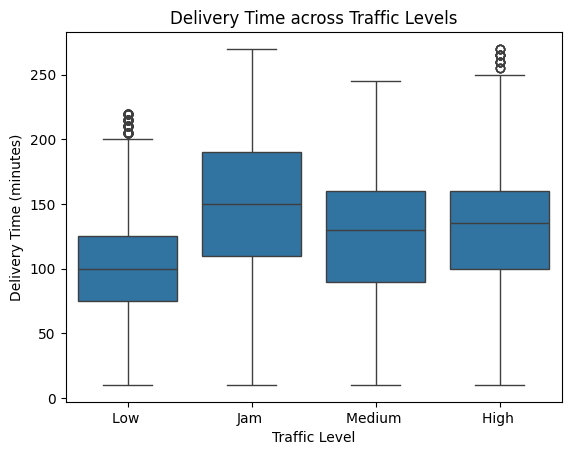

In [40]:
plt.figure()
sns.boxplot(x='Traffic', y='Delivery_Time', data=df, order=df['Traffic'].value_counts().index)
plt.title("Delivery Time across Traffic Levels")
plt.xlabel("Traffic Level")
plt.ylabel("Delivery Time (minutes)")
plt.show()

#### 1. Why this plot?<br>
Ans- The following plot help to understand distribution of data among different traffic type with respect ot time taken.

#### 2.Insight gain from the plot?<br>
Ans- The boxplot helps to understand the data distribution as per the traffic and from this is observed that mostly whe traffic is jam the time taken to delivery is highly variable.

In [10]:
# converting the lattitude and longitude
from math import radians, sin, cos, sqrt, atan2
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*atan2(sqrt(a), sqrt(1-a))
    return R * c

df['Distance_km'] = df.apply(lambda row: haversine(row['Store_Latitude'], row['Store_Longitude'],
                                                   row['Drop_Latitude'], row['Drop_Longitude']), axis=1)

In [11]:
df.iloc[245]

Order_ID                 dkgi875489081
Agent_Age                           26
Agent_Rating                       4.9
Store_Latitude               21.149834
Store_Longitude              72.778666
Drop_Latitude                21.209834
Drop_Longitude               72.838666
Order_Date         2022-03-13 00:00:00
Order_Time                    17:15:00
Pickup_Time                   17:20:00
Weather                          Windy
Traffic                        Medium 
Vehicle                       scooter 
Area                    Metropolitian 
Delivery_Time                      130
Category                   Electronics
Distance_km                   9.122101
Name: 246, dtype: object

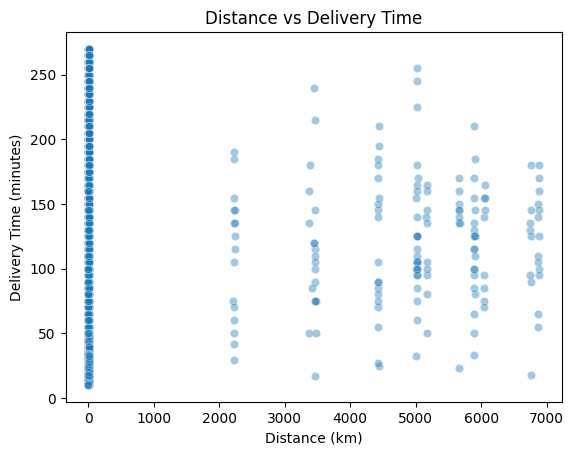

In [12]:
# Scatter plot: Distance vs Delivery Time
plt.figure()
sns.scatterplot(x='Distance_km', y='Delivery_Time', alpha=0.4, data=df)
plt.title("Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (minutes)")
plt.show()

#### 1. Why this plot?<br>
Ans- The following plot help to understand relation amogng the distance of delivery point and time to reach there.

#### 2.Insight gain from the plot?<br>
Ans-Most of the delivery order are under 1000 km very few are present above 1000km .

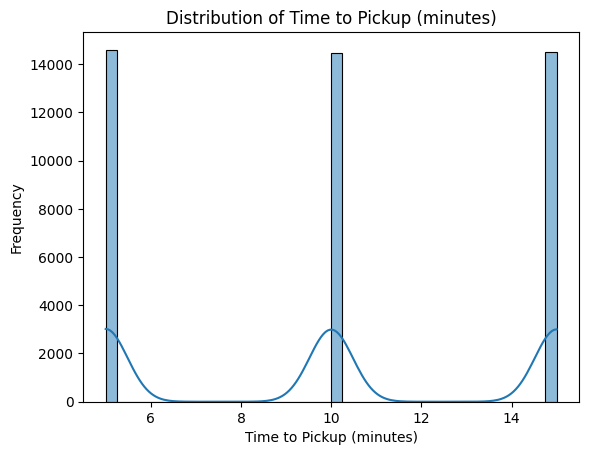

In [13]:
# Time difference between pickup 
# Create full datetime
df['Order_Time_Full'] = df.apply(lambda row: pd.Timestamp.combine(row['Order_Date'], row['Order_Time']), axis=1)
df['Pickup_Time_Full'] = df.apply(lambda row: pd.Timestamp.combine(row['Order_Date'], row['Pickup_Time']), axis=1)
# If pickup earlier than order, add 1 day
df.loc[df['Pickup_Time_Full'] < df['Order_Time_Full'], 'Pickup_Time_Full'] += pd.Timedelta(days=1)

df['Time_to_Pickup_Min'] = (df['Pickup_Time_Full'] - df['Order_Time_Full']).dt.total_seconds() / 60

# Distribution of Time to Pickup
sns.histplot(df['Time_to_Pickup_Min'], bins=40, kde=True)
plt.title("Distribution of Time to Pickup (minutes)")
plt.xlabel("Time to Pickup (minutes)")
plt.ylabel("Frequency")
plt.show()

#### 1. Why this plot?<br>
Ans- The following plot help to understand Time taken to pickup the order by agent.

#### 2.Insight gain from the plot?<br>
Ans- So the time ranges from 5 to 15 min where agent pickup the order which is highly great.

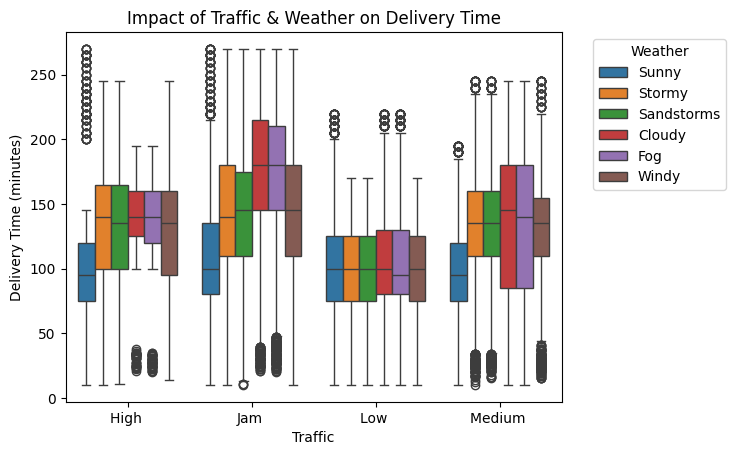

In [15]:
# Facet Boxplot: Traffic vs Delivery Time split by Weather
plt.figure()
sns.boxplot(x="Traffic", y="Delivery_Time", hue="Weather", data=df)
plt.title("Impact of Traffic & Weather on Delivery Time")
plt.xlabel("Traffic")
plt.ylabel("Delivery Time (minutes)")
plt.legend(title="Weather", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 1. Why this plot?<br>
Ans- The following plot help to understand impact of the traffic and weather on delivery time.

#### 2.Insight gain from the plot?<br>
Ans- This plot helps to understand that data is equally distributed when traffic is low in all weather whereas as in othe time it highly vary.

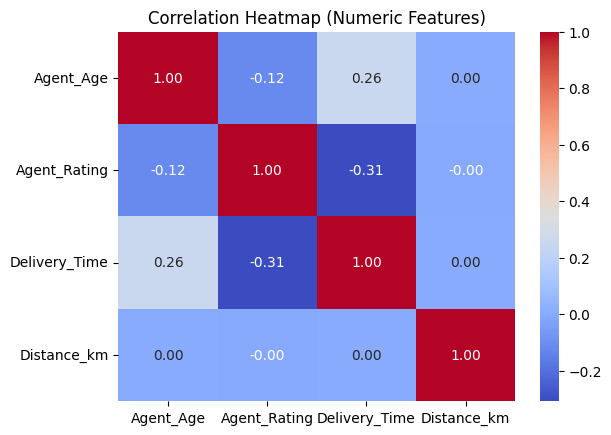

In [16]:
plt.figure()
numeric_cols = ['Agent_Age', 'Agent_Rating',  'Delivery_Time','Distance_km']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

#### 1. Why this plot?<br>
Ans- The following plot help to understand multicollinearity among features.

#### 2.Insight gain from the plot?<br>
Ans- Since there is no strong co-realation among features hence there is no multicollinearity exist.

In [47]:
df.head(4)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Time_to_Pickup_Min,Order_Time_Full,Pickup_Time_Full
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,15.0,2022-03-19 11:30:00,2022-03-19 11:45:00
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,5.0,2022-03-25 19:45:00,2022-03-25 19:50:00
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,15.0,2022-03-19 08:30:00,2022-03-19 08:45:00
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,10.0,2022-04-05 18:00:00,2022-04-05 18:10:00


## Hypothesis testing


#### Hypothesis 1

* H₀ (null): Traffic has no effect on Delivery_Time.

* H₁ (alternative): Traffic affects Delivery_Time.

#### Test: ANOVA

In [54]:
from scipy import stats

# Group delivery times by traffic
groups = [df[df['Traffic']==cat]['Delivery_Time'] for cat in df['Traffic'].unique()]

# Perform ANOVA
f_stat, p_val = stats.f_oneway(*groups)
print("ANOVA F-statistic:", f_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject H0 -> Traffic has significant effecct on delivery time")
else:
    print("Fail to reject H0 -> No significant effect of vehicle type on efficiency for short distances")


ANOVA F-statistic: 2220.299790145671
p-value: 0.0
Reject H0 -> Traffic has significant effecct on delivery time


### Hypotheses 2
* H₀: Foggy or Sandstorm conditions do not increase delivery time compared to Sunny conditions. 
* H₁: Foggy or Sandstorm conditions increase delivery time compared to Sunny conditions. 

#### Test: t-test

In [ ]:
# Subset the groups
extreme_weather = df[df['Weather'].isin(['Fog', 'Sandstorms'])]['Delivery_Time']
sunny_weather = df[df['Weather'] == 'Sunny']['Delivery_Time']

# Perform independent two-sample t-test
t_stat, p_val = stats.ttest_ind(extreme_weather, sunny_weather, alternative='greater')  

print("T-test statistic:", t_stat)
print("p-value:", p_val)

# Interpretation
if p_val < 0.05:
    print("Reject H0 -> Extreme weather (Fog/Sandstorms) significantly increases delivery time compared to Sunny.")
else:
    print("Fail to reject H0 -> No significant increase in delivery time for extreme weather.")

T-test statistic: 35.68374924761624
p-value: 2.2675949505621364e-271
Reject H0 -> Extreme weather (Fog/Sandstorms) significantly increases delivery time compared to Sunny.


### Hypothesis 3
* H₀: Motorcycles, cars, and vans have the same efficiency for short-distance deliveries (<5 km). 
* H₁: Motorcycles are faster than cars and vans for short-distance deliveries. 

#### Test: one-way ANOVA.

In [56]:
# Create efficiency column (km per minute)
df['Efficiency'] = df['Distance_km'] / df['Delivery_Time']

# Subset for short-distance deliveries (<5 km)
short_distance = df[df['Distance_km'] < 5]

# Get efficiency groups by Vehicle
vehicles = short_distance['Vehicle'].unique()
efficiency_groups = [short_distance[short_distance['Vehicle']==v]['Efficiency'] for v in vehicles]

# Perform one-way ANOVA
f_stat, p_val = stats.f_oneway(*efficiency_groups)
print("ANOVA F-statistic:", f_stat)
print("p-value:", p_val)

# Interpretation
if p_val < 0.05:
    print("Reject H0 -> Vehicle type significantly affects efficiency for short distances")
else:
    print("Fail to reject H0 -> No significant effect of vehicle type on efficiency for short distances")


ANOVA F-statistic: 33.4152836176671
p-value: 3.3825230662613016e-15
Reject H0 -> Vehicle type significantly affects efficiency for short distances


In [1]:
df.to_csv('EDA_data.csv')

NameError: name 'df' is not defined

In [3]:
df=pd.read_csv('EDA_data.csv')

In [7]:
df.head(3)

,Unnamed: 0,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Order_Time_Full,Pickup_Time_Full,Time_to_Pickup_Min
0,0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,2022-03-19 11:30:00,2022-03-19 11:45:00,15.0
1,1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,2022-03-25 19:45:00,2022-03-25 19:50:00,5.0
2,2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,2022-03-19 08:30:00,2022-03-19 08:45:00,15.0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Features and target
numeric_features = ['Agent_Age', 'Agent_Rating', 'Distance_km', 'Time_to_Pickup_Min']
categorical_features = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']

X = df[numeric_features + categorical_features]
y = df['Delivery_Time']

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import mlflow
import mlflow.sklearn
import mlflow.xgboost


def eval_metrics(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

def train_and_log_model(model, model_name, params=None):
    with mlflow.start_run(run_name=model_name):
        # Fit
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        # Metrics
        rmse, mae, r2 = eval_metrics(y_test, preds)

        print(f"{model_name} → RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.3f}")

        # Log params & metrics
        if params:
            mlflow.log_params(params)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2", r2)

        # Log model
        mlflow.sklearn.log_model(model, model_name)

        return model, (rmse, mae, r2)


In [14]:
# Set experiment
mlflow.set_experiment("Delivery_Time")

# 1. Linear Regression
with mlflow.start_run(run_name="Linear_Regression"):
    lr_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                  ("model", LinearRegression())])
    lr_pipeline.fit(X_train, y_train)
    # Predict on train & test
    preds_train = lr_pipeline.predict(X_train)
    preds_test = lr_pipeline.predict(X_test)

    # Evaluate
    rmse_train,mae_train, r2_train = eval_metrics(y_train, preds_train)
    rmse_test,mae_test, r2_test = eval_metrics(y_test, preds_test)

    # Log metrics
    mlflow.log_metrics({
        "MAE_train": mae_train, "RMSE_train": rmse_train, "R2_train": r2_train,
        "MAE_test": mae_test, "RMSE_test": rmse_test, "R2_test": r2_test
    })

    mlflow.log_param("model", "LinearRegression")
    mlflow.sklearn.log_model(lr_pipeline, artifact_path='LinearRegression')




2025/10/05 16:03:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/05 16:04:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [15]:
# 2. Random Forest
with mlflow.start_run(run_name="Random_Forest"):
    rf_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                  ("model", RandomForestRegressor(n_estimators=100, random_state=42))])
    rf_pipeline.fit(X_train, y_train)

    # Predict on train & test
    preds_train = rf_pipeline.predict(X_train)
    preds_test = rf_pipeline.predict(X_test)

    # Evaluate
    mae_train, rmse_train, r2_train = eval_metrics(y_train, preds_train)
    mae_test, rmse_test, r2_test = eval_metrics(y_test, preds_test)

    # Log metrics
    mlflow.log_metrics({
        "MAE_train": mae_train, "RMSE_train": rmse_train, "R2_train": r2_train,
        "MAE_test": mae_test, "RMSE_test": rmse_test, "R2_test": r2_test
    })

    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_estimators", 100)
    mlflow.sklearn.log_model(rf_pipeline, name='Random Forest')

2025/10/05 16:05:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [16]:
# 3. XGBoost
with mlflow.start_run(run_name="XGBoost"):
    xgb_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", XGBRegressor(
            n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42
        ))
    ])
    
    xgb_pipeline.fit(X_train, y_train)
     # Predict on train & test
    preds_train = xgb_pipeline.predict(X_train)
    preds_test = xgb_pipeline.predict(X_test)

    # Evaluate
    mae_train, rmse_train, r2_train = eval_metrics(y_train, preds_train)
    mae_test, rmse_test, r2_test = eval_metrics(y_test, preds_test)

    # Log metrics
    mlflow.log_metrics({
        "MAE_train": mae_train, "RMSE_train": rmse_train, "R2_train": r2_train,
        "MAE_test": mae_test, "RMSE_test": rmse_test, "R2_test": r2_test
    })


    mlflow.log_param("model", "XGBoost")
    mlflow.log_param("n_estimators", 200)
    mlflow.log_param("learning_rate", 0.1)
    mlflow.log_param("max_depth", 6)

    mlflow.sklearn.log_model(xgb_pipeline, "XGboost")


2025/10/05 16:05:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/05 16:05:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [17]:
import joblib
joblib.dump(xgb_pipeline,'xgb_model.joblib')

['xgb_model.joblib']

In [19]:
xgb_load=joblib.load('xgb_model.joblib')
new_test=xgb_load.predict(X_test)

In [ ]:

rmse_test,mae_test, r2_test = eval_metrics(y_test, new_test)


In [21]:
print(rmse_test,mae_test,r2_test)

507.3733215332031 17.54952621459961 0.8070692420005798


## <b>Conclusion</b>


The following project aim to predcit the time taken to deliver the order to the customer which can help e-commerce business to enchance the customer satisfaction and also predict the operation time for delivery.This considered various aspect of the data and try to predict time.Multiple model was tried among which Xgboost performed best so to deploy it as streamlit app.The final project of this model is to give UI where the various feature is taken as input to predict devliery time based on trained model.